In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(88)
x = 2 * np.random.random(size=100)
y = x * 3. + 4. + np.random.normal(size=100)

In [3]:
X = x.reshape(-1,1)

In [4]:
X.shape

(100, 1)

In [5]:
y.shape

(100,)

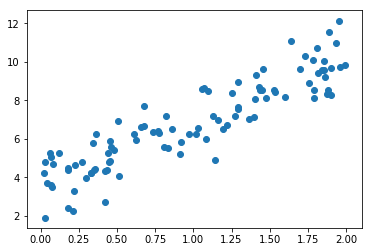

In [6]:
plt.scatter(x, y)

### 使用梯度下降

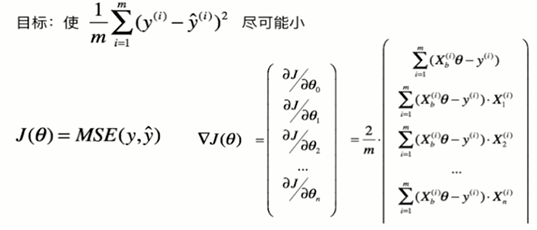

In [7]:
def J(theta,X_b, y):
    try:
        return np.sum((y - x_b.dot(theta)) **2) / len(X_b)
    except:
        return float('inf')

In [8]:
def dJ(theta, X_b, y):
    res = np.empty(len(theta))
    
    # 对第一行求解
    res[0] = np.sum(X_b.dot(theta) - y)
    
    # 对于其他航求解
    for i in range(1,len(theta)):
        res[i] = np.sum((X_b.dot(theta) -y).dot(X_b[:,i]))
        
    return res * 2 / len(X_b)

In [9]:
def gradient_descent(X_b, y, inital_theta, eta, n_iters = 1e2, epsilon=1e-8):
    theta = inital_theta
    i_iter = 0
    
    while i_iter < n_iters:
        gradient = dJ(theta, X_b, y)
        last_theta = theta
        theta = theta - eta * gradient
        
        if(abs(J(theta, X_b, y) - J(last_theta, X_b, y)) < epsilon):
            break
            
        i_iter += 1
        
    return theta

In [10]:
X_b = np.hstack([np.ones((len(X), 1)), X])
inital_theta = np.zeros(X_b.shape[1])
eta = 0.01
theta = gradient_descent(X_b=X_b,y=y,inital_theta=inital_theta, eta=eta)

In [11]:
theta

array([3.21877711, 3.52747888])

### 封装我们的信息宁回归算法

In [12]:
from grid.LinearRegression import LinearRegression
lin_reg = LinearRegression()

In [13]:
lin_reg.fit_gd(X, y)

LinearRegression()

In [14]:
lin_reg.coef_

array([3.27786416])

In [15]:
lin_reg.intercept_

3.6063596551712704